# Линейный конгруэнтный генератор Лемера 1951

## Необходимые импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import pandas as pd

## Функции генератора

In [2]:
def rand(u, m=5, c=0, p=7):
    while True:
        u = (u * m + c) % p
        assert u >= 1 and u <= p - 1
        r = u / p
        assert r > 0 and r < 1
        yield r


def rand_seq(seed, n, m=5, c=0, p=7):
    g = rand(seed, m, c, p)
    return [g.__next__() for i in range(n)]

Пример использования:

In [3]:
display(rand_seq(1, 10))

[0.7142857142857143,
 0.5714285714285714,
 0.8571428571428571,
 0.2857142857142857,
 0.42857142857142855,
 0.14285714285714285,
 0.7142857142857143,
 0.5714285714285714,
 0.8571428571428571,
 0.2857142857142857]

## Тесты

### 1. Нахождение периода

In [4]:
def test_period(u0, m, p):
    g = rand(u0, m=m, p=p)
    
    L = 1
    r0 = g.__next__()
    while r0 != g.__next__():
        L += 1
        
    return L

### 2. Корреляция

In [5]:
def test_correlation(r, k=1):
    numerator = np.mean([a * b for a, b in zip(r[k:], r[:len(r) - k])]) - np.mean(r[:len(r) - k]) * np.mean(r[k:])
    
    denominator = np.mean([ri * ri for ri in r]) - np.mean(r)**2
    
    return numerator / denominator

### 3. Задача нахождения числа пи

In [6]:
def test_pi(r):
    c = sum(1 if np.sqrt(r[2*i]**2 + r[2*i+1]**2) < 1 else 0 for i in range(len(r) // 2))
    return 8 * c / len(r)

### Выполнение тестов

Задание общих переменных:

In [49]:
points = 100  # кол-во точек на оси абсцисс
u0 = 1
M = [1030, 777, 1140671485, 96230]
P = [99999, 13652, 5406546, 450641]

Выполнение и вывод результата:

,m,p,L,pi,pi diff
0,1030,99999,540,3.274074,-0.132481
1,777,13652,3412,3.146542,-0.004949
2,1140671485,5406546,37466,3.139486,0.002106
3,96230,450641,450640,3.141878,-0.000286


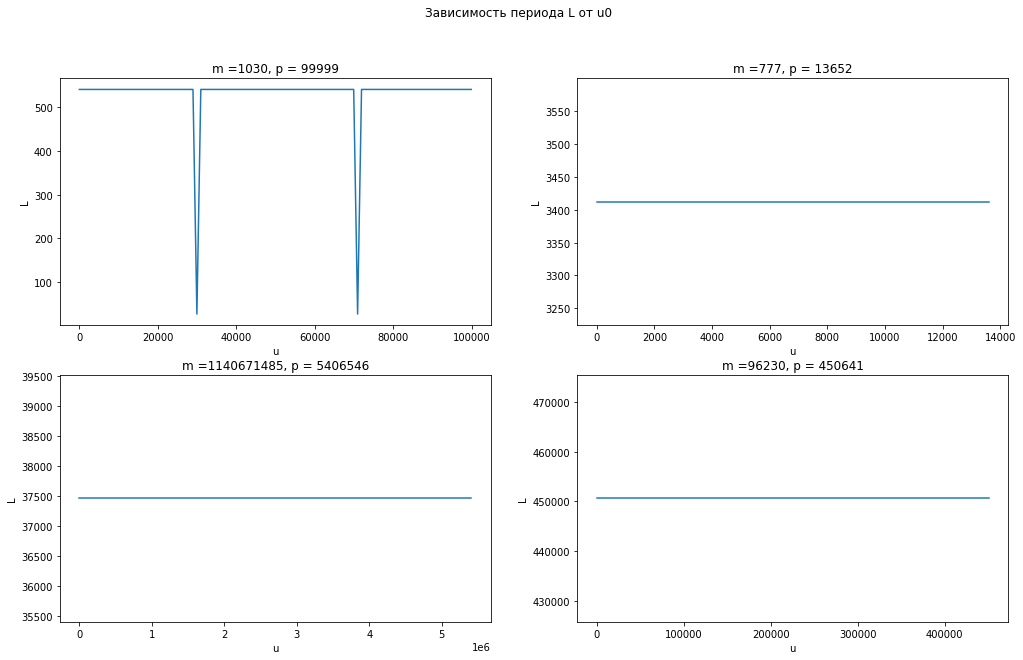

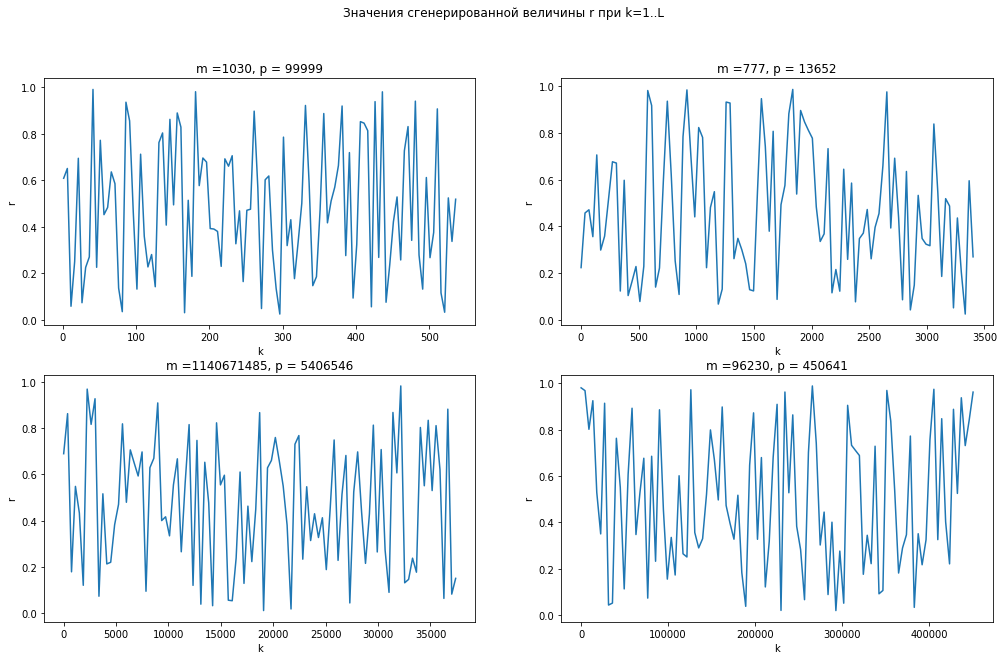

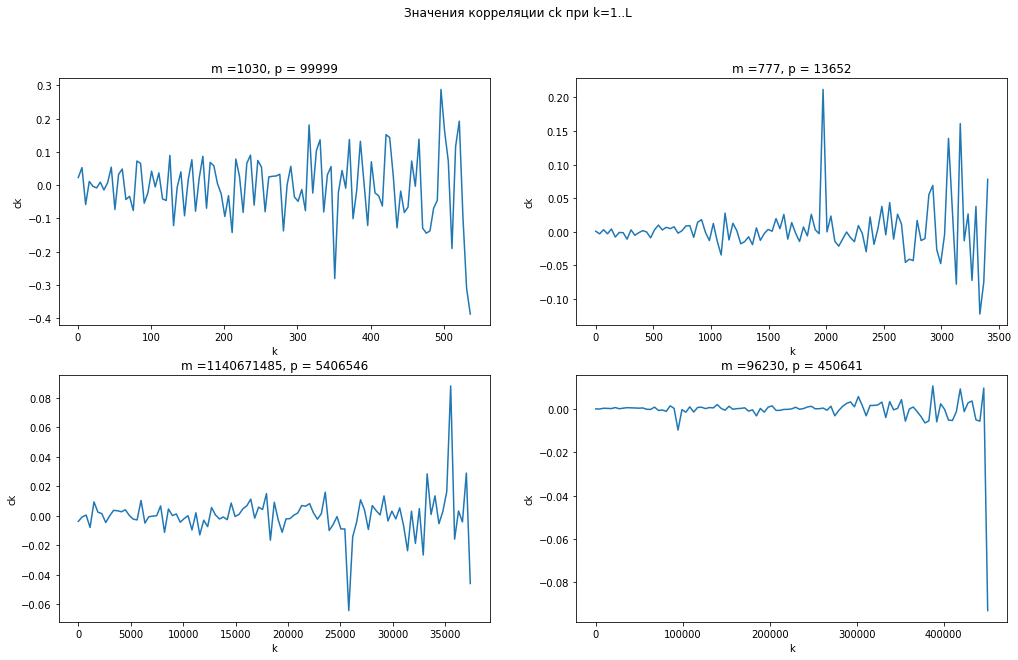

In [51]:
# для одновременного отображения результатов
res = {
    'u': [],
    'L': [],
    'L_list': [],
    'k_list': [],
    'r': [],
    'ck': [],
    'pi': []
}

# цикл по исходным значениям
for m, p in zip(M, P):
    u = list(range(1, p, p // points))
    res['u'].append(u)

    # 1. Нахождение периода
    L = test_period(u0, m, p)
    res['L'].append(L)
    res['L_list'].append([test_period(x, m, p) for x in u])

    # 2. Корреляция
    r = rand_seq(u0, L, m=m, p=p)
    k_list = list(range(1, L, L // points))
    res['k_list'].append(k_list)
    res['r'].append([r[k] for k in k_list])

    ck = [test_correlation(r, k=k) for k in k_list]
    res['ck'].append(ck)

    # 3. Задача нахождения числа пи
    res['pi'].append(test_pi(r))
    
# Вывод результатов
table = { 'm': M, 'p': P, 'L': res['L'], 'pi': res['pi'], 'pi diff': [np.pi - pi for pi in res['pi']] }
display(pd.DataFrame(table))

fig_1, axs_1 = plt.subplots(2, 2)
fig_1.set_size_inches(17, 10)
fig_1.suptitle("Зависимость периода L от u0")
for i, ax in enumerate(axs_1.flat):
    ax.plot(res['u'][i], res['L_list'][i])
    ax.set_title('m ={}, p = {}'.format(M[i], P[i]))
    ax.set(xlabel='u', ylabel='L')

fig_2, axs_2 = plt.subplots(2, 2)
fig_2.set_size_inches(17, 10)
fig_2.suptitle("Значения сгенерированной величины r при k=1..L")
for i, ax in enumerate(axs_2.flat):
    ax.plot(res['k_list'][i], res['r'][i])
    ax.set_title('m ={}, p = {}'.format(M[i], P[i]))
    ax.set(xlabel='k', ylabel='r')

fig_3, axs_3 = plt.subplots(2, 2)
fig_3.set_size_inches(17, 10)
fig_3.suptitle("Значения корреляции ck при k=1..L")
for i, ax in enumerate(axs_3.flat):
    ax.plot(res['k_list'][i], res['ck'][i])
    ax.set_title('m ={}, p = {}'.format(M[i], P[i]))
    ax.set(xlabel='k', ylabel='ck')